In [1]:
# import packages
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#load the data
data_frame = pd.read_csv("T40.4_TLW.txt",delimiter="\t")
data_frame = data_frame.drop(axis = "columns", columns = "Year")

In [3]:
#replace "unreliable" with NaN
data_frame=data_frame.replace("Unreliable",np.nan)

In [4]:
#edit the names of columns for easier analysis
data_frame = data_frame.rename(columns={'Single Race 6': 'Race', 'Year Code' : 'Year' })
data_frame = data_frame[data_frame['Year'] != 2023]

In [5]:
#preview data
data_frame[(data_frame["Gender"] == "Female")& (data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total")]

,Notes,Gender,Gender Code,Race,Single Race 6 Code,Year,Deaths,Population,Crude Rate
0,NaN,Female,F,American Indian or Alaska Native,1002-5,2018.0,64.0,2058223.0,3.1
1,NaN,Female,F,American Indian or Alaska Native,1002-5,2019.0,107.0,2079286.0,5.1
2,NaN,Female,F,American Indian or Alaska Native,1002-5,2020.0,214.0,2132816.0,10.0
3,NaN,Female,F,American Indian or Alaska Native,1002-5,2021.0,344.0,2162418.0,15.9
4,NaN,Female,F,American Indian or Alaska Native,1002-5,2022.0,388.0,2164826.0,17.9


In [6]:
#define variables for each gender and race
CFb = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)

CFw = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)

CFa = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMa = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian")& 
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)

CFn = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMn = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)

In [7]:
#separate year and crude rate variables for each gender and race
x1b=CFb["Year"]
y1b=CFb["Crude Rate"]

x2b=CMb["Year"]
y2b=CMb["Crude Rate"]

x1w=CFw["Year"]
y1w=CFw["Crude Rate"]

x2w=CMw["Year"]
y2w=CMw["Crude Rate"]

x1a=CFa["Year"]
y1a=CFa["Crude Rate"]

x2a=CMa["Year"]
y2a=CMa["Crude Rate"]

x1n=CFn["Year"]
y1n=CFn["Crude Rate"]

x2n=CMn["Year"]
y2n=CMn["Crude Rate"]

In [8]:
#fit data for each race and gender
coeffFb = np.polyfit(x1b, y1b, 2)
coeffMb = np.polyfit(x2b, y2b, 2)

coeffFw = np.polyfit(x1w, y1w, 2)
coeffMw = np.polyfit(x2w, y2w, 2)

coeffFa = np.polyfit(x1a, y1a, 2)
coeffMa = np.polyfit(x2a, y2a, 2)

coeffFn = np.polyfit(x1n, y1n, 2)
coeffMn = np.polyfit(x2n, y2n, 2)

([<matplotlib.axis.XTick at 0x17e4277d0>,
 [Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

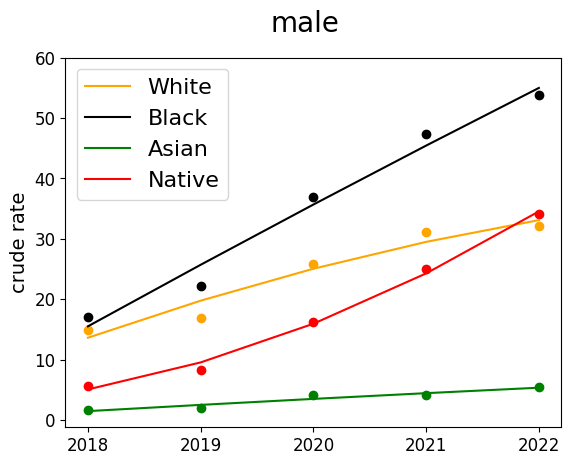

In [9]:
#plot the male data for each race
plt.plot(x2w, np.polyval(coeffMw,x2w), color='orange', label = "White")
plt.scatter(x2w,y2w, color='orange')

plt.plot(x2b, np.polyval(coeffMb,x2b), color='black', label = "Black")
plt.scatter(x2b,y2b, color='black')

plt.plot(x2a, np.polyval(coeffMa,x2a), color='green', label = "Asian")
plt.scatter(x2a,y2a, color='green')

plt.plot(x2n, np.polyval(coeffMn,x2n), color='red', label = "Native")
plt.scatter(x2n,y2n, color='red')

plt.suptitle('male', fontsize=20)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.legend(frameon=True, fontsize=16)
#adjust axes
plt.yticks(np.arange(0, 60.5, 10.0))
plt.xticks(np.arange(2018, 2022.5, 1.0))
#plt.savefig('AttemptT40.4_MaleRaces_2R.png')

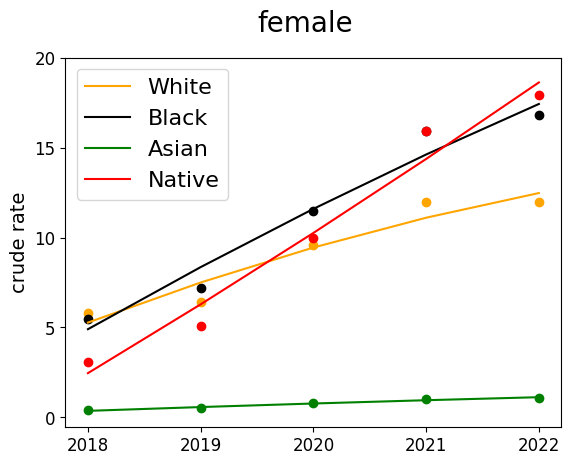

In [10]:
#plot the female data for each race
plt.plot(x1w, np.polyval(coeffFw,x1w), color='orange', label = "White")
plt.scatter(x1w,y1w, color='orange')

plt.plot(x1b, np.polyval(coeffFb,x1b), color='black', label = "Black")
plt.scatter(x1b,y1b, color='black')

plt.plot(x1a, np.polyval(coeffFa,x1a), color='green', label = "Asian")
plt.scatter(x1a,y1a, color='green')

plt.plot(x1n, np.polyval(coeffFn,x1n), color='red', label = "Native")
plt.scatter(x1n,y1n, color='red')

#adjust axes
plt.yticks(np.arange(0, 20.5, 5.0))
plt.xticks(np.arange(2018, 2022.5, 1.0))

plt.suptitle('female', fontsize=20)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.legend(frameon=True, fontsize=16)
#plt.savefig('T40.4_FemaleRaces.png')